In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install osmnx
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.4
    Uninstalling geopandas-0.14.4:
      Successfully uninstalled geopandas-0.14.4


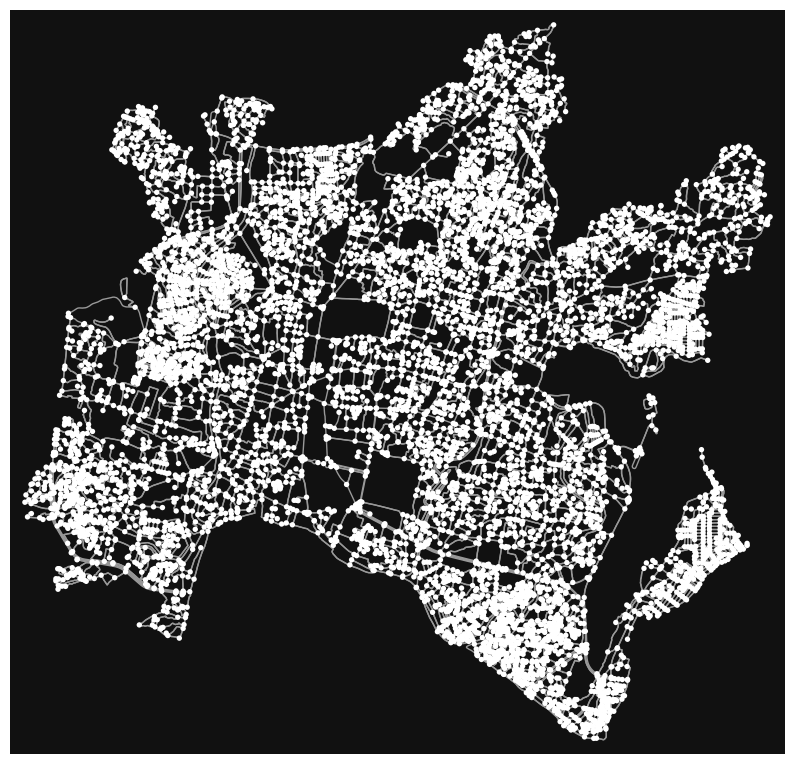

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [3]:
import osmnx as ox
import networkx as nx

# Define location (Nepal) and transport mode (driving, walking, biking)
place_name = "Kathmandu Nepal"
G = ox.graph_from_place(place_name, network_type="drive")

# Convert to undirected graph (if needed)
# G = ox.utils_graph.get_undirected(G)

# Plot the graph
ox.plot_graph(G, figsize=(10, 10))


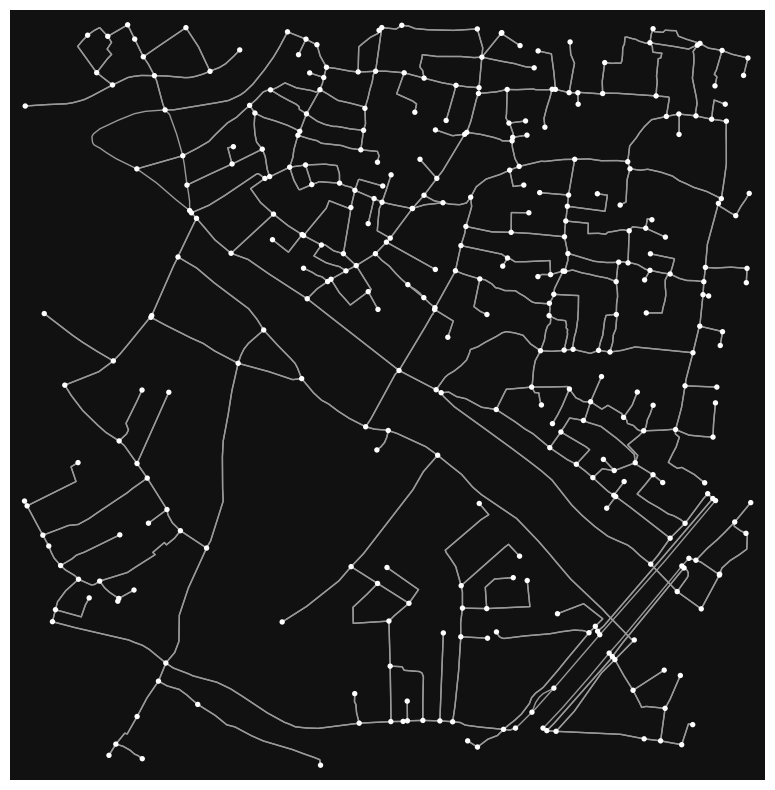

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [4]:
place = ox.graph_from_address("Koteshwor,Nepal",dist=500.78)
ox.plot_graph(place,figsize=(10,10))

In [5]:
!pip install geopy


### Stating Node location

In [6]:
start_osmid = list(place.nodes)[10]
print(list(place.nodes)[10])

1127867287


In [9]:
node_id = list(place.nodes)[10]  # Picking the 100th node for example

# Get node attributes
node_data = place.nodes[node_id]

In [10]:
latitude = node_data['y']
longitude = node_data['x']
print(latitude,longitude)

27.6742842 85.3334255


In [11]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="osm_lookup")

# Get the nearest place name
location = geolocator.reverse((latitude, longitude), exactly_one=True)

# Print results
print(f"Nearest Place: {location.address}")

Nearest Place: Saptakhya Sadak, भोला ढोका, क्वाकों, Lalitpur-09, ललितपुर, ललितपुर महानगरपालिका, ललितपुर, बागमती प्रदेश, 44707, नेपाल


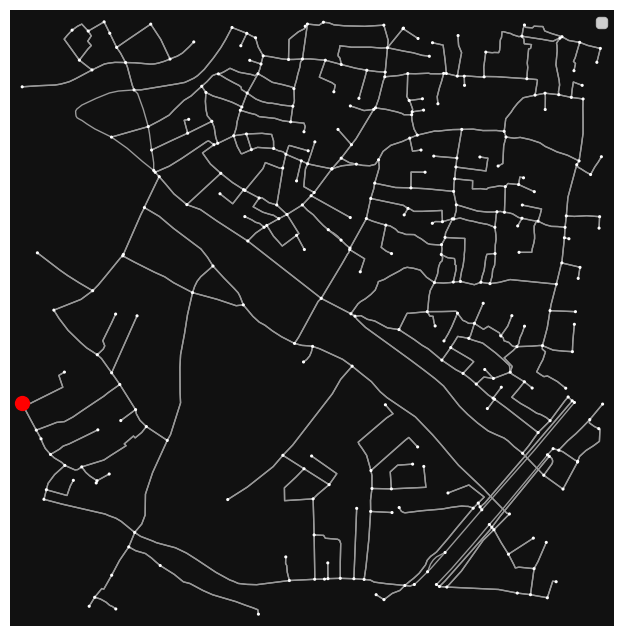

In [12]:
import matplotlib.pyplot as plt
fig, ax = ox.plot_graph(place, node_size=5, show=False, close=False)

# Highlight the specific node
ax.scatter(longitude, latitude, c="red", s=100, marker="o")

# Add annotation for place name
# place_name = location.address if location else "Unknown Place"
# ax.text(longitude, latitude, place_name, fontsize=10, color="black")

plt.legend()
plt.show()

### Target Node location

1924770845
27.6778961 85.3383052
Nearest Place: ठुलोधारा, सुविधानगर, Kathmandu-32, काठमाडौँ महानगरपालिका, काठमाडौं, बागमती प्रदेश, 44617, नेपाल


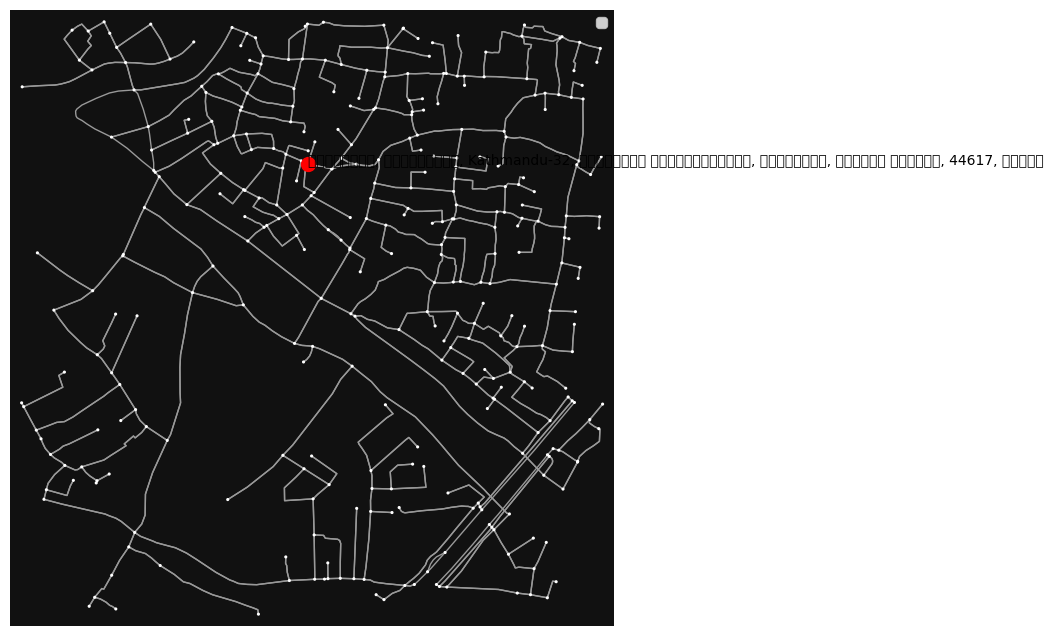

In [13]:

### Target
node_id = list(place.nodes)[100]  # Picking the 100th node for example
print(node_id)
# Get node attributes
node_data = G.nodes[node_id]
latitude = node_data['y']
longitude = node_data['x']
print(latitude,longitude)

location = geolocator.reverse((latitude, longitude), exactly_one=True)

# Print results
print(f"Nearest Place: {location.address}")

fig, ax = ox.plot_graph(place, node_size=5, show=False, close=False)

# Highlight the specific node
ax.scatter(longitude, latitude, c="red", s=100, marker="o")

# Add annotation for place name
place_name = location.address if location else "Unknown Place"
ax.text(longitude, latitude, place_name, fontsize=10, color="black")

plt.legend()
plt.show()

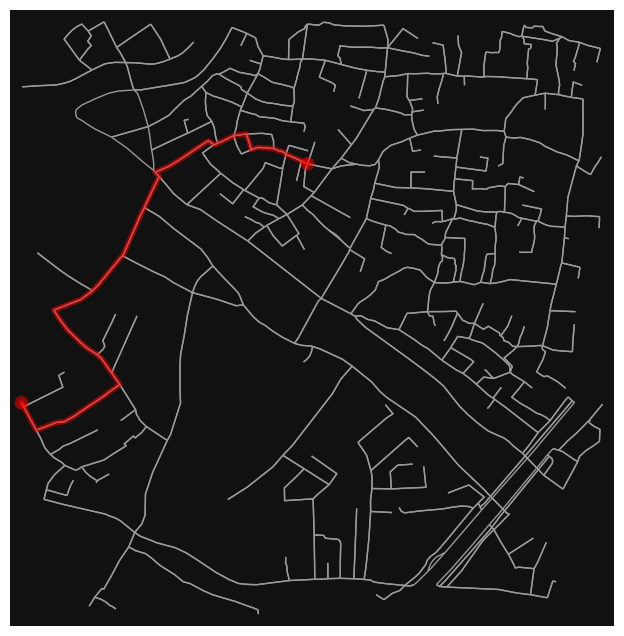

In [14]:
start_node = 1127867287
end_node = 1924770845

# Check if nodes exist in the graph
if start_node not in place or end_node not in place:
    raise ValueError("One or both node IDs are not in the graph!")

# Step 3: Find the shortest path between them
try:
    route = nx.shortest_path(place, source=start_node, target=end_node, weight="length")
except nx.NetworkXNoPath:
    raise ValueError("No path found between the given nodes!")

# Step 4: Plot the graph with the highlighted route
fig, ax = ox.plot_graph_routes(place, [route], route_colors=["red"], route_linewidth=5, node_size=0, show=False, close=False)

# Display the plot
plt.show()

### Adding stop point

 total time to execute: 0.18705129623413086 seconds


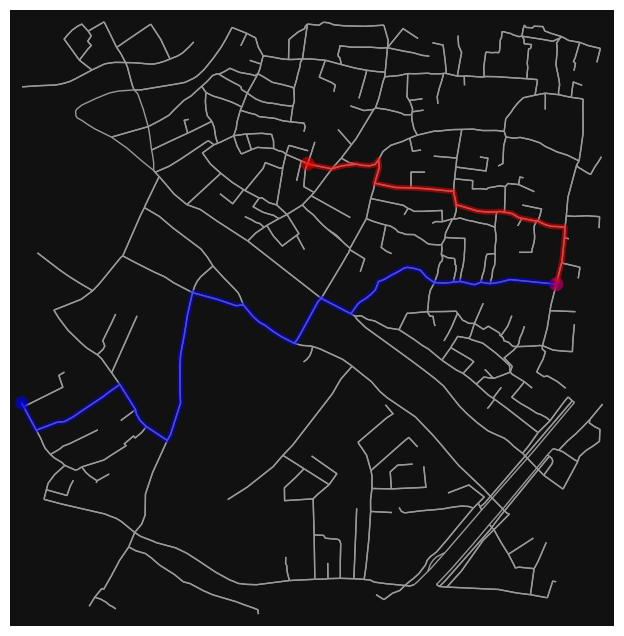

Start Node: 1127867287
Stop Node: 672686362
End Node: 1924770845
Total Path Length: 34 nodes


In [17]:
# Step 2: Define start, stop, and end nodes (Replace with actual OSMIDs)
import time
st = time.time()
start_node = 1127867287
stop_node = 672686362  # Example stop point
end_node = 1924770845  # Example end point (Replace with a valid OSMID)

# Step 3: Check if nodes exist in the graph
for node in [start_node, stop_node, end_node]:
    if node not in place:
        raise ValueError(f"Node {node} is not in the graph!")

# Step 4: Find shortest paths
try:
    path1 = nx.shortest_path(place, source=start_node, target=stop_node, weight="length")
    path2 = nx.shortest_path(place, source=stop_node, target=end_node, weight="length")
    full_path = path1 + path2[1:]  # Merge paths, avoiding duplicate stop_node
except nx.NetworkXNoPath:
    raise ValueError("No path found between given nodes!")

# Step 5: Plot the graph with the route
fig, ax = ox.plot_graph_routes(
    place, [path1, path2], route_colors=["blue", "red"], route_linewidth=3, node_size=0, show=False, close=False
)
print(f" total time to execute: {time.time()-st} seconds")
# Show the plot
plt.show()

# Print path details
print(f"Start Node: {start_node}")
print(f"Stop Node: {stop_node}")
print(f"End Node: {end_node}")
print(f"Total Path Length: {len(full_path)} nodes")


In [ ]:
nodes, edges = ox.graph_to_gdfs(place)
nodes.head(5)

In [ ]:
# Step 3: Find all adjacent nodes (next nodes)
neighbors = list(place.neighbors(start_osmid))
print(f"Next Nodes: {neighbors}")

In [ ]:
all_paths = []  # Store all paths

for neighbor in neighbors:
    try:
        # Use networkx.all_simple_paths to get ALL paths instead of just the shortest one
        paths = list(nx.all_simple_paths(place, source=start_osmid, target=neighbor, cutoff=10))  # Limit path length to 10
        all_paths.extend(paths)  # Store all paths
    except nx.NetworkXNoPath:
        print(f"No path found between {start_osmid} and {neighbor}")


num_paths = len(all_paths)
colors = ox.plot.get_colors(num_paths)
print(all_paths)
# Step 6: Plot the graph and highlight each path differently
fig, ax = ox.plot_graph_routes(place, [[1127867287,1924770845]], route_colors="red", route_linewidth=3, node_size=0)

# Show the plot
plt.show()

# Print total paths found


In [ ]:
# Define origin and destination coordinates
orig_point = ( 27.71138, 85.37254)  # Kathmandu,gothatar
dest_point = (27.68978, 85.2856)  # Pokhara

# Find nearest graph nodes
orig_node = ox.distance.nearest_nodes(G, X=orig_point[1], Y=orig_point[0])
dest_node = ox.distance.nearest_nodes(G, X=dest_point[1], Y=dest_point[0])

print(f"Origin Node: {orig_node}, Destination Node: {dest_node}")


In [ ]:
# Find the shortest path
shortest_path = nx.shortest_path(G, source=orig_node, target=dest_node, weight="length")

# Plot the shortest path
ox.plot_graph_route(G, shortest_path, route_linewidth=3, node_size=0)


In [ ]:
from networkx.algorithms.shortest_paths.astar import astar_path

path_astar = astar_path(G, orig_node, dest_node, weight="length")
ox.plot_graph_route(G, path_astar, route_linewidth=3, node_size=0)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
shortest_path = nx.shortest_path(G, source=orig_node, target=dest_node, weight="length")

# Step 4: Plot the road network and the shortest path
fig, ax = ox.plot_graph_route(G, shortest_path, route_linewidth=3, node_size=0)

# Show the plot
plt.show()